## Download and prepare the dataset

In [35]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow import random
import tensorflow.python.keras as k
k.backend.set_floatx("posit160")
k.backend.floatx()

random.set_seed(512)

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Download and prepare the dataset

In [36]:

from tensorflow.python.keras import layers
from tensorflow.python.keras import models

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

Let's display the architecture of our convnet so far:

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [37]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                51264     
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

In [38]:
earlystop_callback = k.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)

model.compile(optimizer='adam',
              loss=k.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [39]:
history = model.fit(train_images,
                    train_labels,
                    epochs=25,
                    batch_size=128,
                    validation_split=0.1,
                    callbacks=[earlystop_callback])

Epoch 1/25
422/422 [==============================] - 237s 563ms/step - loss: 1.2158 - accuracy: 0.0837 - val_loss: 2.2607 - val_accuracy: 0.0952
Epoch 2/25
422/422 [==============================] - 232s 550ms/step - loss: 1.2158 - accuracy: 0.0852 - val_loss: 2.2607 - val_accuracy: 0.0952
Epoch 3/25
422/422 [==============================] - 240s 569ms/step - loss: 1.2158 - accuracy: 0.0840 - val_loss: 2.2607 - val_accuracy: 0.1000
Epoch 4/25
422/422 [==============================] - 231s 548ms/step - loss: 1.2158 - accuracy: 0.0852 - val_loss: 2.2607 - val_accuracy: 0.1000
Epoch 5/25
422/422 [==============================] - 236s 559ms/step - loss: 1.2158 - accuracy: 0.0858 - val_loss: 2.2607 - val_accuracy: 0.1050
Epoch 6/25
422/422 [==============================] - 253s 601ms/step - loss: 1.2158 - accuracy: 0.0816 - val_loss: 2.2607 - val_accuracy: 0.0995
Epoch 7/25
422/422 [==============================] - 250s 593ms/step - loss: 1.2158 - accuracy: 0.0813 - val_loss: 2.2607 -

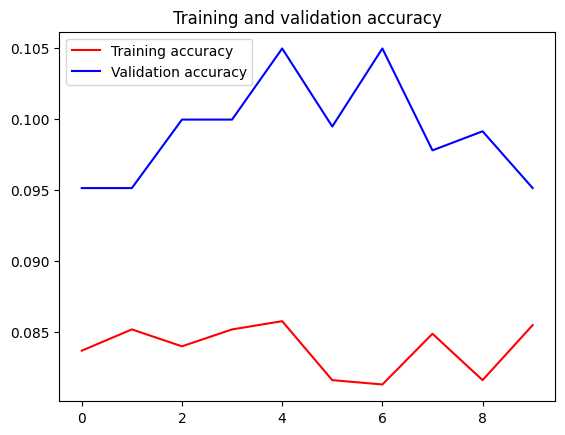

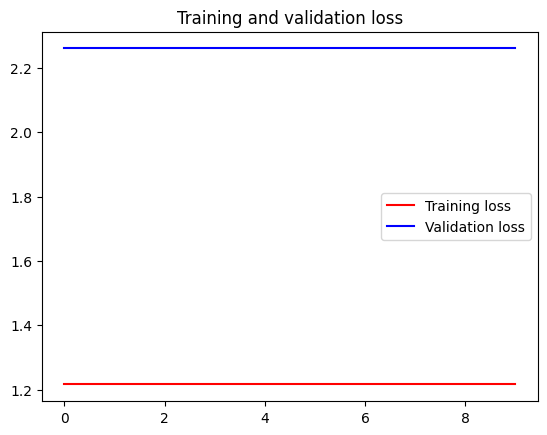

In [40]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##  Evaluating the model on the test set

In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 28s 89ms/step - loss: 2.0439 - accuracy: 0.0959


In [42]:
test_acc

0.0959473

In [43]:
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
first_layer_weights

array([[[[-0.197205, -0.197937, -0.195129, -0.196716, -0.197815,
          -0.197205, -0.195007, -0.195496, -0.194885, -0.195312,
          -0.197937, -0.197144, -0.195374, -0.197571, -0.196228,
          -0.195984]],

        [[-0.197388, -0.195679, -0.196228, -0.19574, -0.195801,
          -0.19696, -0.195251, -0.195679, -0.195007, -0.195068,
          -0.195129, -0.197327, -0.196594, -0.19751, -0.195679,
          -0.196228]],

        [[-0.197632, -0.196289, -0.197937, -0.195801, -0.196899,
          -0.197449, -0.19519, -0.197876, -0.196472, -0.195984,
          -0.196045, -0.194946, -0.197876, -0.195862, -0.196716,
          -0.195923]]],


       [[[-0.196228, -0.196228, -0.196228, -0.195129, -0.196594,
          -0.195923, -0.197876, -0.197815, -0.19519, -0.196655,
          -0.19574, -0.196655, -0.196716, -0.195496, -0.195374,
          -0.196106]],

        [[-0.196167, -0.19696, -0.195435, -0.194885, -0.19519,
          -0.195007, -0.196106, -0.195618, -0.195801, -0.195312,


In [45]:
prediction = model.predict(train_images[:1])
print("prediction shape:", prediction.shape)
prediction

prediction shape: (1, 10)


array([[0.0953674, 0.10434, 0.094635, 0.092804, 0.097229, 0.0858154,
        0.115967, 0.115967, 0.104736, 0.0931702]], dtype=posit160)